## Projeto 04 ⭐
Modelo de Classificação

#### Caracteristicas (features, x)
* mileage_per_year

* model_year

* price


#### Classificação (target, y)

**sold**

* 1 = VENDEU

* 0 = NAO VENDEU

In [17]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [25]:
renomear = {
    "mileage_per_year":"milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}
dados = dados.rename(columns=renomear)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [9]:
trocar = {
    "no": 0,
    "yes": 1
}

dados.vendido = dados.vendido.map(trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [10]:
from datetime import datetime
ano_atual = datetime.today().year
dados["idade_do_modelo"] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [11]:
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [12]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [13]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [18]:
SEED = 20
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, stratify = y)
print("Treino: {}, Teste: {}".format(len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

Treino: 7500, Teste: 2500


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


A acuracia foi 56.96%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acuracia do dummy stratified %.2f%%" % acuracia)

A acuracia do dummy stratified 52.20%


In [20]:
dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acuracia do dummy most frequent %.2f%%" % acuracia)

A acuracia do dummy most frequent 58.00%


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, stratify = y)
print("Treino: {}, Teste: {}".format(len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f" % acuracia)

Treino: 7500, Teste: 2500
A acuracia foi 77.48


## Arvore de Decisao


In [28]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, stratify = y)
print("Treino: {}, Teste: {}".format(len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f" % acuracia)

Treino: 7500, Teste: 2500
A acuracia foi 76.84


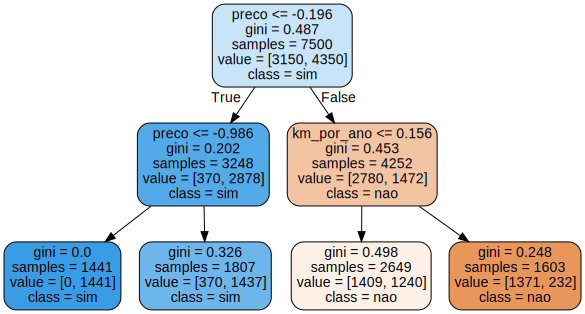

In [29]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                          feature_names=features,
                          class_names = ["nao", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Os valores dos recursos (preco, km_por_ano, etc.) foram padronizados usando StandardScaler. Isso explica por que os valores que você vê no gráfico não são os valores originais, mas sim os valores padronizados (normalizados).

In [30]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, stratify = y)
print("Treino: {}, Teste: {}".format(len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % acuracia)

Treino: 7500, Teste: 2500
A acuracia foi 76.84%


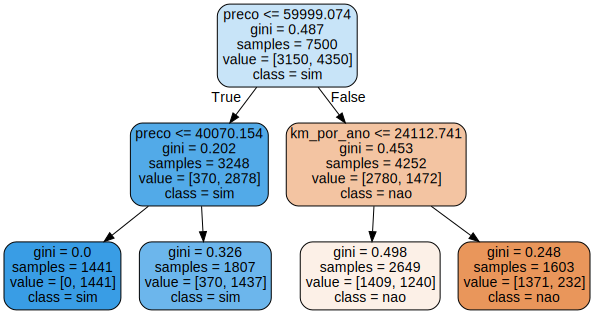

In [31]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                          feature_names=features,
                          class_names = ["nao", "sim"])
grafico = graphviz.Source(dot_data)
grafico

### Despadronizado:
Se o preco for menor que 59k, vai para esquerda, se o preco for menor que 40k ou o contrario, a resposta sera sim. Se o preco for maior que 60k, entao ira depender do km_por_ano, se rodou muito, nao sera vendido.
> A cor mais forte eh mais forte, para indicar uma maior certeza.
>
> `samples` - quantidade de dados que estao sendo analisados para tormar decisao (7500) tudo que foi treinado).
>
> `samples = 3248` na esquerda representam a quantidade dos que foram menor que 60k.
>
> `samples` - quantidade dos dados que foram maiores do que 60k, nesse caso 4252. Quantos foram maiores que 60k e km_por_ano menor que 24k, foram 2649.